In [2]:
# Copyright 2022 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com

# Lab 1: Intro to TensorFlow and Music Generation with RNNs

##Part 1: Intro to TensorFlow
###0.1 Install TensorFlow

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1 MB 15.1 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=5061c0d26fb489805c27e9531ccfc374502f011cca7cdd8d369e8c53695c6c1e
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


###1.1 Why is TensorFlow called TensorFlow?
TensorFlow는 다차원 배열로 이해할 수 있는 데이터 구조인 Tensor의 흐름(node/mathmatical operation)을 제어한다.

Tensor의 shape은 차원의 수와, 각 차원의 크기를 정의한다.
Tensor의 rank는 tensor의 차원, 순서 혹은 차수로 생각할 수있다.

In [4]:
sport = tf.constant("Tennis", tf.string) # 첫번째는 제공되는 값, 두번째 인자는 dtype
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy())) #tf.rank는 Tensor의 차원을 나타낸다.
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


백터나, 리스트도 1-d tensor를 만드는데 사용 될 수 있다.

In [5]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]



2-d 행렬과, 보다 더 높은 차원의 tensor를 만들어보자. 차후에 이미지 처리 및 컴퓨터 비전과 관련된 에제에서는 4-d tensor를 사용하게 될 것이다.

In [6]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1,2,3,4],[5,6,7,8]], tf.int64)# TODO


assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [7]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10,256,256,3]) #tf.zeros는 첫번째 인자로 shape를 받고, 해당 shape에 맞는 tensor를 0으로 초기화 시켜서 제공한다.
print(tf.shape(images))

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

tf.Tensor([ 10 256 256   3], shape=(4,), dtype=int32)


보셨듯이 텐서의 모양은 각 텐서 차원의 원소 수를 제공합니다. 모양도 꽤 유용하고, 자주 사용할 거예요. 슬라이싱을 사용하여 상위 텐서 내의 하위 센서에 액세스할 수도 있습니다.

In [8]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))


`row_vector`: [5 6 7 8]
`column_vector`: [3 7]
`scalar`: 7


###1.2 Computations on Tensors

TensorFlow에서 계산을 생각하고 시각화하는 편리한 방법은 그래프이다. 이 그래프를 텐서(Tensors)의 관점에서 정의할 수 있습니다. 텐서(Tensors)는 데이터를 저장하고, 텐서(Tensors)에 작용하는 수학적 연산을 순서에 따라 정의할 수 있습니다. 간단한 예를 보고 TensorFlow를 사용하여 이 계산을 정의하겠습니다.

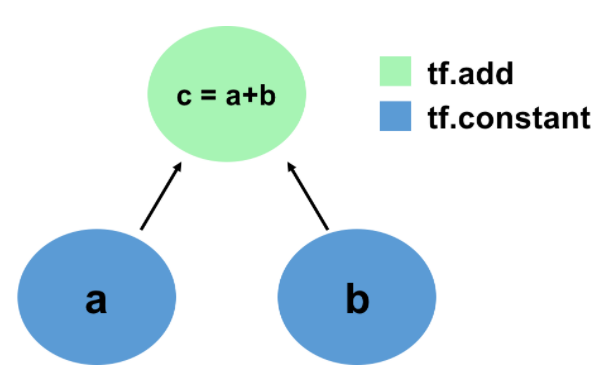


In [9]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


여기서는 a, b의 두 가지 입력을 취하여 출력 e를 계산합니다. 그래프의 각 노드는 어떤 입력을 받고, 어떤 계산을 하고, 그 출력을 다른 노드로 전달하는 연산을 나타낸다.

이 계산 함수를 구성하기 위해 TensorFlow에서 간단한 함수를 정의해 봅시다.

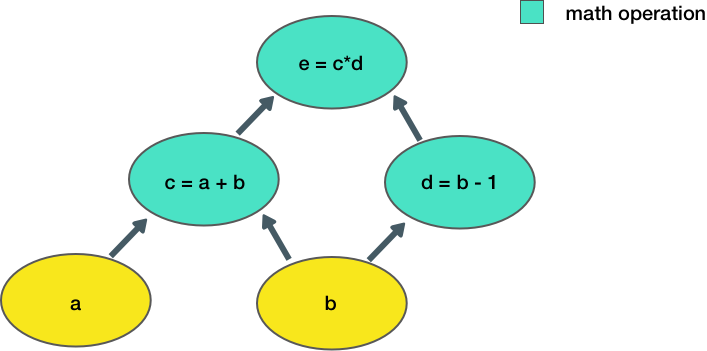

In [10]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


###1.3 Neural networks in TensorFlow

TensorFlow에서 신경망을 정의할 수도 있다. TensorFlow는 딥 러닝 모델을 구축하고 훈련하기 위한 강력하고 직관적인 프레임워크를 제공하는 Keras라는 고급 API를 사용한다.
  
먼저 하나의 dense layer를 가지는 퍼셉트론의 예를 생각해 보자.

그래프를 사용하여 이 연산을 시각화할 수도 있습니다.

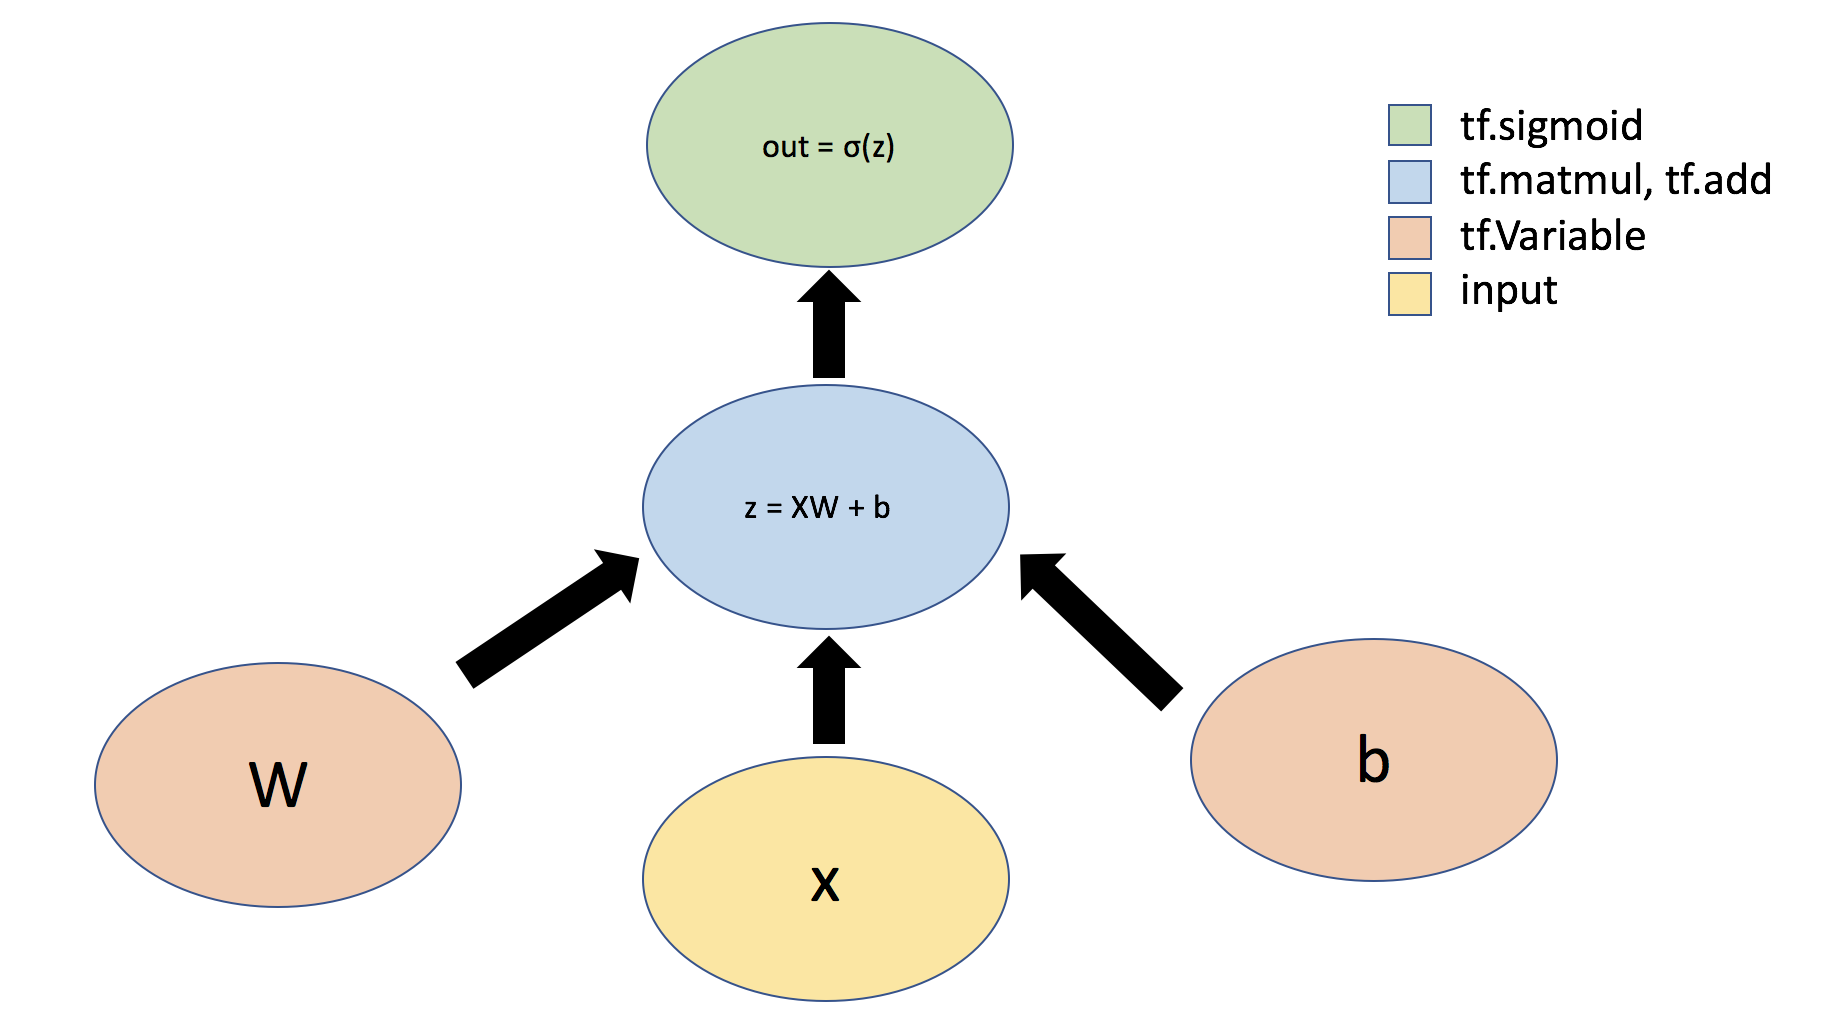

텐서는 신경망의 구성 요소인 layer를 통해 흐를 수 있습니다. layer는 일반적인 신경망 작업을 구현하며 weight를 업데이트하고 loss를 계산하며 계층 간 연결을 정의하는 데 사용된다. 우리는 먼저 위에서 정의한 간단한 퍼셉트론을 구현하기 위한 layer를 정의할 것입니다.


In [23]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # 이부분이 뭔지 잘 모르겠다.. shape에 들어가는게 bias랑 다른게 뭐지?
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality #얘는 왜 d가 아니고 1인거지? w개수만큼 b가 있어야 하는거 아닌가
    

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x,self.W) + self.b

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2)) #이 shape이라는게 잘 이해가 안간다는거지... 이게 하나의 층인건가? 
# 이게 숫자가 두개니까... 2개를 넣은건가? >> 그냥 제공하는 넘파이의 형태를 나타낸거 같은데?// shape(1,3) 하고 제공하는 숫자를 늘려도 안됨.why?
y = layer.call(x_input)

# test the output!
print(y.numpy()) #답은 왜 3개가 나오는거지? 넣은건 2개인디 >> output_nodes 를 3으로 설정해서 그런거같은데 그렇게 하면 모델의 전체 구조가 뭔데?

[[0.26978594 0.45750415 0.66536945]]


[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

TensorFlow는 dense와 같이 일반적으로 사용되는 여러 개의 layer를 정의했다.케라스의 Sequential model과 하나의 dense layer를 사용하여 네트워크를 구성해보자. Sequential API를 사용하면 빌딩 블록과 같은 layer를 함께 쌓아서 신경망을 쉽게 만들 수 있습니다.

In [28]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer =tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2)) # 얘는 숫자 바꿔줘도 잘 동작한다. 아마 위에서는 추가적인 코딩이 필요한듯

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy()
# model_output = # TODO
print(model_output)

[[0.29139334 0.54298383 0.39214194]]


Sequential API를 사용하여 model을 정의하는 것 외에도, model 훈련과 추론을 가능하게 하기 위해 layer를 함께 그룹화하는 model 클래스를 직접 하위 분류하여 neural network을 정의할 수 있다. model 클래스는 우리가 "model" 또는 "네트워크"라고 부르는 것을 캡처합니다. Subclassing을 사용하면 model에 대한 클래스를 만든 다음 호출 함수를 사용하여 layer를 통과하는 forward pass를 정의할 수 있습니다. 하위 분류는  flexibility to define custom layers, custom training loops, custom activation functions, and custom models 등을 제공합니다. Sequential model이 아닌 Subclassing을 사용하여 위와 같은 신경망을 정의합시다.

In [32]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.''' 
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)


n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.29996255 0.62776643 0.48460072]], shape=(1, 3), dtype=float32)


Subclassing은 맞춤형 모델을 정의할 수 있는 많은 유연성을 제공한다. 예를 들어, 우리는 call 함수에서 boolean 인수를 사용하여 train 및 predict 중 서로 다른 동작을 수행하도록 할 수 있습니다. 네트워크가 어떠한 동요도 없이 단순히 입력을 출력하기를 원한다고 가정하자. 우리는 이 동작을 제어하기 위해 boolean 인수 isidentity를 정의한다.

In [34]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  '''TODO: Implement the behavior where the network outputs the input, unchanged, 
      under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity: # TODO
      return inputs # TODO
    return x

n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input)
out_identity = model.call(x_input, True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.1969584 0.6330007 0.7668015]]; network identity output: [[1. 2.]]


###1.4 Automatic differentiation in TensorFlow
Automatic differentiation(자동 미분)은 TensorFlow의 가장 중요한 부분 중 하나이며  backpropagation을 이용한 훈련의 중추이다. 우리는 TensorFlow  tf.GradientTape를 사용할 것입니다. GradientTape는 나중에 gradients 계산을 위해 작업을 추적합니다.

네트워크를 통해 forward pass가 이루어질 때, 모든 forward pass 과정은 테이프에 기록된다. 기본적으로 테이프는 뒤로 재생된 후에 폐기된다.GradientTape는 하나의  gradients만 계산할 수 있으며 이후 호출은 런타임 오류를 발생시킵니다. 그러나 영구 그라데이션 테이프를 만들어 동일한 계산에 대해 여러 gradient을 계산할 수 있다.

먼저 GradientTape를 사용하여 그레이디언트를 계산하고 계산을 위해 액세스하는 방법을 살펴보겠습니다. 우리는 간단한 함수를 정의하고 계산해 봅시다.

In [37]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

이제 GradientTape가 미분을 계산하고 액세스하는 데 어떻게 사용될 수 있는지 알게 되었으므로 Automatic differentiation 및 SGD를 사용하여 최소값을 찾는 예를 살펴보겠습니다.

Initializing x=[[-0.35975078]]


Text(0, 0.5, 'x value')

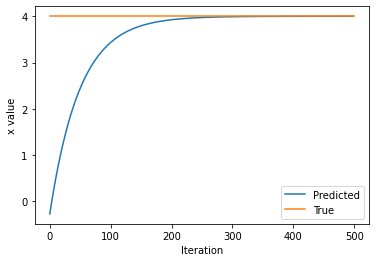

In [40]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f)**2

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
## 사실 그냥 SGD라기에는 batch가 없으니깐.. 그렇게 표현하기는 어려울거같긴느한데...